In [1]:
from ho_optimization import ho_exercise as data

In [28]:
bounds = np.array([
    [-6,  32,  4,  4,  4],
    [ 0, 512, 10, 10, 10]
    # learning rate, batch size, #layer 1, #layer 2, #layer 3
])

numIter = 50
numMeasure = 10

# Random Search

In [105]:
import numpy as np
import random as rand
import time

In [19]:
def randomBounds(paraBounds):
    return [rand.randint(paraBounds[0][it], paraBounds[1][it]) for it in range(0, len(paraBounds[0]))]

In [133]:
def randomSeach(numIter = 50):
    res = {'fmin' : [np.inf], 'runtime' : [np.inf]}
    for it in range(0, numIter):
        startTime = time.time()
        x = randomBounds(bounds)
        res['fmin'].append(min(res['fmin'][-1], data.objective_function(x)))
        endTime = time.time()
        # runtime optimizer + function runtime
        res['runtime'].append((endTime - startTime) + data.runtime(x))
    res['fmin'] = np.delete(res['fmin'], [0])
    res['runtime'] = np.delete(res['runtime'], [0])
    return res

In [134]:
cumsum = np.zeros(numIter)
fMinSum = np.zeros(numIter)
for run in range(0, numMeasure):
    arr = randomSeach(numIter)
    cumsum += np.cumsum(arr['runtime'])
    fMinSum += arr['fmin']

runtimeRand = 1/numMeasure * cumsum
fMinRand = 1/numMeasure * fMinSum

# Bayesian Optimization

In [24]:
from robo.fmin import bayesian_optimization
import numpy as np

In [82]:
cumsum = np.zeros(numIter)
fMinSum = np.zeros(numIter)
for run in range(0, numMeasure):
    bay = bayesian_optimization(data.objective_function, bounds[0], bounds[1], acquisition_func="lcb",maximizer="scipy", num_iterations=numIter, model_type="gp")
    #fMinSum += np.array(bay["incumbent_values"])
    fMinSum += bay["incumbent_values"]
    tmpRuntime = []
    for elt in bay['X']:
        tmpRuntime.append(data.runtime(elt))
    # runtime optimizer + function runtime
    cumsum += np.cumsum(tmpRuntime)
    cumsum += bay["runtime"]

runtimeBay = 1/numMeasure * cumsum
fMinBay = 1/numMeasure * fMinSum

# Plots and results

The minimum function value found:

In [208]:
print("Random Seach min       : ", fMinRand[-1], " in ", np.round(runtimeRand[-1],1), "s") 
print("Bayesian Optimizer min : ", fMinBay[-1], " in ", np.round(runtimeBay[-1],1), "s")

Random Seach min       :  0.170975814507  in  18620.5 s
Bayesian Optimizer min :  0.168488075466  in  29409.9 s


In [37]:
from matplotlib import pyplot as plt

Minimum function value over iterations

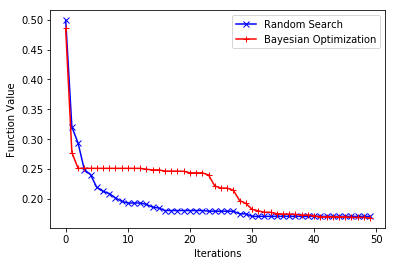

In [191]:
plt.figure(0)
plt.xlabel('Iterations')
plt.ylabel('Function Value')
randPlot, = plt.plot(range(numIter), fMinRand, marker='x', color='blue', label='Random Search')
bayPlot, = plt.plot(range(numIter), fMinBay, marker='+', color='red', label='Bayesian Optimization')
plt.legend(handles=[randPlot, bayPlot])
plt.show()

Number of iterations till bayesian optimizer reaches lower values than random seach

In [205]:
print(np.argmin(np.abs(fMinRand - fMinBay)), "iteration")

44 iteration


Total cumulative runtime over iterations

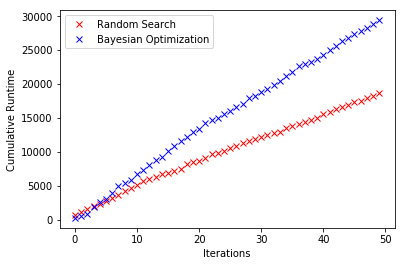

In [138]:
plt.figure(1)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Runtime')
randPlot, = plt.plot(range(numIter), runtimeRand, marker='x', color='blue', label='Random Search')
bayPlot, = plt.plot(range(numIter), runtimeBay, marker='+', color='red', label='Bayesian Optimization')
plt.legend(handles=[randPlot, bayPlot])
plt.show()

Minimum function values over cumulative runtime

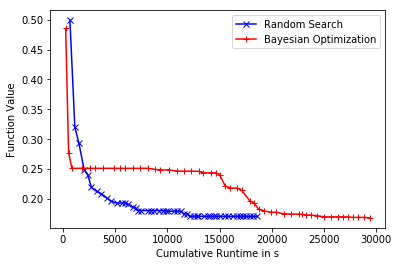

In [149]:
plt.figure(1)
plt.xlabel('Cumulative Runtime in s')
plt.ylabel('Function Value')
randPlot, = plt.plot(runtimeRand, fMinRand, marker='x', color='blue', label='Random Search')
bayPlot, = plt.plot(runtimeBay, fMinBay, marker='+', color='red', label='Bayesian Optimization')
plt.legend(handles=[randPlot, bayPlot])
plt.show()

# What if both optimizer had the same time to run?

How many iteration (and procent) has the bayesian optimizer done till random reach was finished?

In [204]:
bayOper = np.argmin(np.abs(runtimeBay - runtimeRand[-1]))
print(bayOper, 'iteration')
print(np.round((runtimeBay[-1]/runtimeRand[-1])*100 - 100, 1), '%')

30 iteration
57.9 %


In [178]:
newIter = int(runtimeBay[-1]/runtimeRand[-1] * numIter)

In [179]:
cumsum = np.zeros(newIter)
fMinSum = np.zeros(newIter)
for run in range(0, numMeasure):
    arr = randomSeach(newIter)
    cumsum += np.cumsum(arr['runtime'])
    fMinSum += arr['fmin']

newRuntimeRand = 1/numMeasure * cumsum
newFMinRand = 1/numMeasure * fMinSum

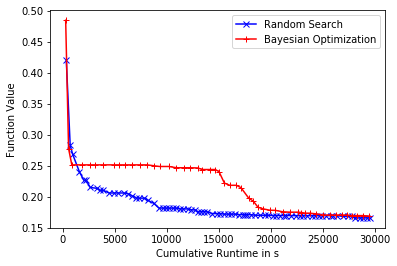

In [182]:
plt.figure(1)
plt.xlabel('Cumulative Runtime in s')
plt.ylabel('Function Value')
randPlot, = plt.plot(newRuntimeRand, newFMinRand, marker='x', color='blue', label='Random Search')
bayPlot, = plt.plot(runtimeBay, fMinBay, marker='+', color='red', label='Bayesian Optimization')
plt.legend(handles=[randPlot, bayPlot])
plt.show()

In [211]:
print("Random Seach min       : ", newFMinRand[-1], " in ", np.round(newRuntimeRand[-1],1), "s")
print("Bayesian Optimizer min : ", fMinBay[-1], " in ", np.round(runtimeBay[-1],1), "s") 

Random Seach min       :  0.16560162193  in  29543.2 s
Bayesian Optimizer min :  0.168488075466  in  29409.9 s
